<a href="https://colab.research.google.com/github/jeetshah0303/Artificialintelligence/blob/main/PAD_Lab_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## FRAUD DETECTION ON A CREDITCARD DATASET

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


In [ ]:
df = pd.read_csv("creditcard.csv")

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.shape

(284807, 31)

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
data = df.sample(frac = 0.3, random_state=1)

In [ ]:
num_classes = pd.value_counts(df['Class'], sort=True)

Text(0, 0.5, 'Frequency')

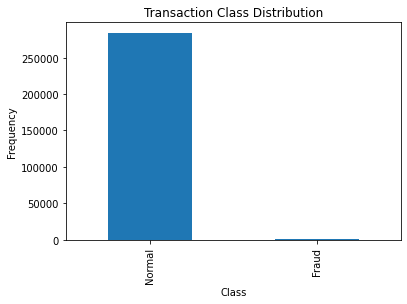

In [ ]:
# Plot the number of transactions per class

num_classes.plot(kind='bar')
plt.title('Transaction Class Distribution')
plt.xticks(range(2), ['Normal', 'Fraud'])
plt.xlabel('Class')
plt.ylabel('Frequency')

In [ ]:
fraud = df[df['Class']==1]
normal = df[df['Class']==0]
print('Fraud transactions: ', fraud.shape[0],'\nNormal transactions: ', normal.shape[0])

Fraud transactions:  492 
Normal transactions:  284315


In [ ]:
fraud_fraction = data[data['Class']==1]
normal_fraction = data[data['Class']==0]
print('Fraud transactions: ', fraud_fraction.shape[0],'\nNormal transactions: ', normal_fraction.shape[0])

Fraud transactions:  135 
Normal transactions:  85307


Exploring the dataset to try and check whether any feature can convery any additional information that can be used to classify better

(0.0, 20000.0)

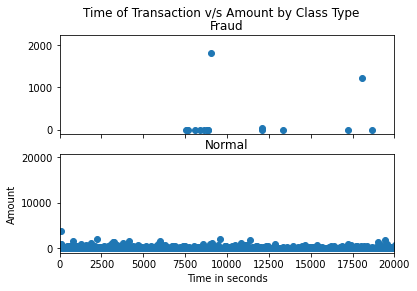

In [ ]:
#  Time

f, (ax1, ax2) = plt.subplots(2,1, sharex=True)
f.suptitle('Time of Transaction v/s Amount by Class Type')

# First Plot
ax1.scatter(fraud_fraction.Time, fraud_fraction.Amount)
ax1.set_title('Fraud')
plt.ylabel('Amount')

#Second Plot
ax2.scatter(normal_fraction.Time, normal_fraction.Amount)
ax2.set_title('Normal')
plt.ylabel('Amount')
plt.xlabel('Time in seconds')
plt.xlim((0,20000))

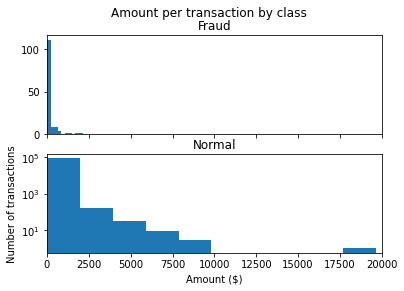

In [ ]:
f, (ax1, ax2) = plt.subplots(2,1, sharex=True)
f.suptitle('Amount per transaction by class')
bins=10
# First Plot
ax1.hist(fraud_fraction.Amount, bins=bins)
ax1.set_title('Fraud')

#Second Plot
ax2.hist(normal_fraction.Amount, bins=bins)
ax2.set_title('Normal')

plt.ylabel('Number of transactions')
plt.xlabel('Amount ($)')
plt.xlim((0,20000))
plt.yscale('log')

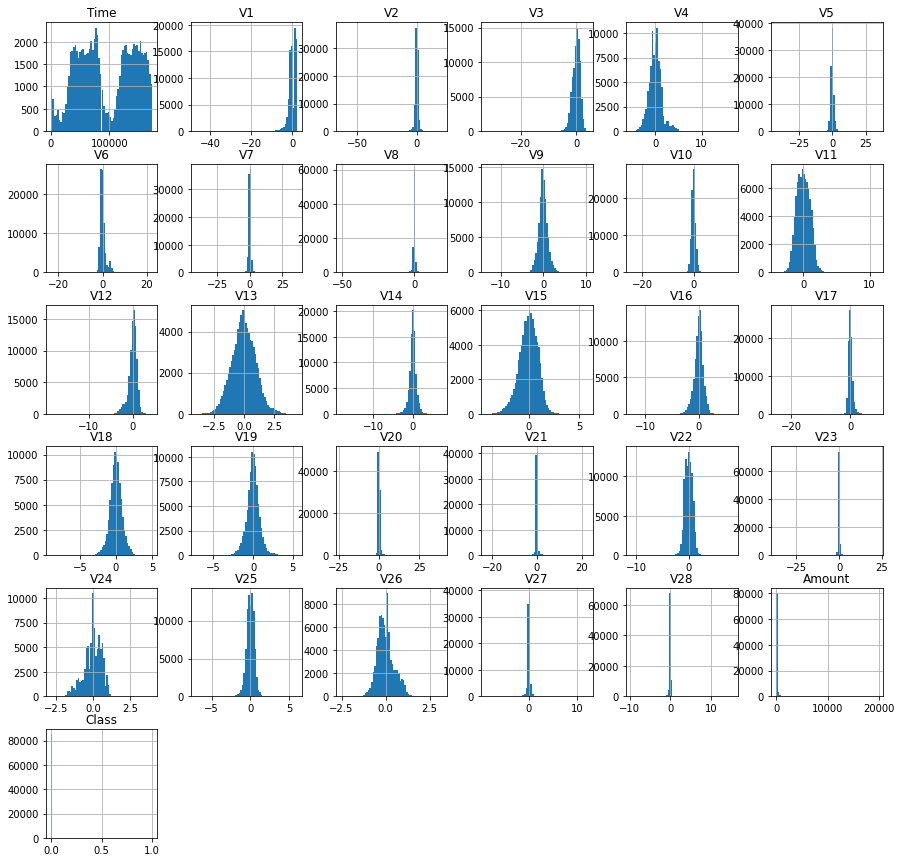

In [ ]:
''' 
To detect the anomaly, each feature should be normally distributed 
so that we can apply unsupervised anomaly detection algorithm

Plotting the histogram of each feature
'''

data.hist(figsize=(15,15), bins=64)
plt.show()


In [ ]:
features = data.columns.tolist()
target = features[-1]

In [ ]:
print(features)

['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']


In [ ]:
data.shape

(85442, 31)

In [ ]:
''' Split the dataset into train and test
data.shape = (85442, 31)
80% training
'''

X_train = data.iloc[:68400, 1:-1]
y_train = data.iloc[:68400, -1]
print('X_train: ',X_train.shape)
print('y_train: ', y_train.shape)
print('\n-----------------------\n')

X_test = data.iloc[68400:, 1:-1]
y_test = data.iloc[68400: , -1]
print('X_test: ',X_test.shape)
print('y_test: ', y_test.shape)

X_train:  (68400, 29)
y_train:  (68400,)

-----------------------

X_test:  (17042, 29)
y_test:  (17042,)


In [ ]:
anomaly_fraction = len(fraud_fraction)/float(len(fraud_fraction)+len(normal_fraction))# Ratio of fraud:total transactions
model = LocalOutlierFactor(contamination=anomaly_fraction)

In [ ]:
y_train_pred = model.fit_predict(X_train)

In [ ]:
y_train_pred[y_train_pred==1]=0 #inliers
y_train_pred[y_train_pred==-1]=1 #outliers

In [ ]:
y_test_pred = model.fit_predict(X_test)

y_test_pred[y_test_pred==1]=0 #inliers
y_test_pred[y_test_pred==-1]=1 #outliers

Text(0.5, 1.0, 'Confusion matrix')

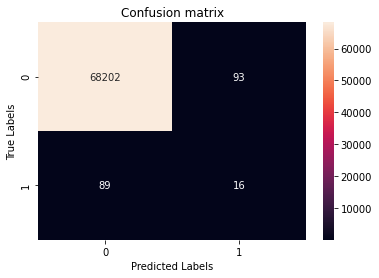

In [ ]:
import seaborn as sns
cm_train = confusion_matrix(y_train, y_train_pred)
ax = plt.subplot()
sns.heatmap(cm_train, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion matrix')

Text(0.5, 1.0, 'Confusion matrix')

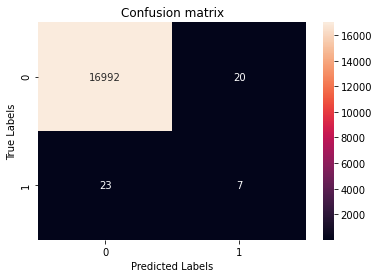

In [ ]:
cm_test = confusion_matrix(y_test, y_test_pred)
ax = plt.subplot()
sns.heatmap(cm_test, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion matrix')